<a href="https://colab.research.google.com/github/kumarmohit0911/Breast_cancer_detector_model/blob/main/Breast_cancer_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#uploading the file on google colab
from google.colab import files
uploaded = files.upload()


In [110]:
import pandas as pd
df = pd.read_csv('breast-cancer-wisconsin.csv')
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [111]:
df.drop('id',axis = 1, inplace = True)
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [112]:
df['class'].map({2:0,4:1})

,class
0,0
1,0
2,0
3,0
4,0
...,...
694,0
695,0
696,1
697,1


In [113]:
df.shape

(699, 10)

In [114]:
df.dropna()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   clump_thickness    699 non-null    int64 
 1   size_uniformity    699 non-null    int64 
 2   shape_uniformity   699 non-null    int64 
 3   marginal_adhesion  699 non-null    int64 
 4   epithelial_size    699 non-null    int64 
 5   bare_nucleoli      699 non-null    object
 6   bland_chromatin    699 non-null    int64 
 7   normal_nucleoli    699 non-null    int64 
 8   mitoses            699 non-null    int64 
 9   class              699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [116]:
import numpy as np
df['bare_nucleoli'] = df['bare_nucleoli'].replace('?',np.nan)
# df['bare_nucleoli'] = df['bare_nucleoli'].replace(nan,df['bare_nucleoli'].median())
# replaced the nan values with median of the col after replacing all the '?' values
df['bare_nucleoli'] = df['bare_nucleoli'].astype('float')
df['bare_nucleoli'] = df['bare_nucleoli'].fillna(df['bare_nucleoli'].median())

In [117]:
# Now we gonna build the neural network to make a model which will be trained on the above data.
# As data is less sp we can face overfitting but as we are studying on building of ANN so we gonne stick ont his only even tough RandomForest can have better accuracy than this.
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.initializers import HeNormal



In [118]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim = 9,kernel_initializer=HeNormal(),kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(5,activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1,activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 285 (1.11 KB)

 Non-trainable params: 46 (184.00 B)

In [120]:
# now we gonna get the training and testing data done for feeding the model to train
from sklearn.model_selection import train_test_split
X=df.drop('class',axis =1)
y=df['class'].map({2:0,4:1})
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)


In [121]:
X_train

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
163,1,1,1,2,1,3.0,1,1,7
286,10,10,10,10,10,10.0,4,10,10
612,8,10,10,10,6,10.0,10,10,10
517,1,1,1,1,1,1.0,2,1,1
464,4,1,1,1,2,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...
71,6,10,2,8,10,2.0,7,8,10
106,10,10,10,8,2,10.0,4,1,1
270,8,4,7,1,3,10.0,3,9,2
435,10,8,10,1,3,10.0,5,1,1


In [122]:
y_train

,class
163,0
286,1
612,1
517,0
464,0
...,...
71,1
106,1
270,1
435,1


In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
X_train

array([[-1.2512746 , -0.71221017, -0.7604691 , ..., -0.98397553,
        -0.60230204,  3.06191756],
       [ 1.94191318,  2.24446514,  2.22817446, ...,  0.20955035,
         2.37823984,  4.76816868],
       [ 1.2323159 ,  2.24446514,  2.22817446, ...,  2.59660211,
         2.37823984,  4.76816868],
       ...,
       [ 1.2323159 ,  0.27334827,  1.23195994, ..., -0.18829161,
         2.04706852,  0.2181657 ],
       [ 1.94191318,  1.58742618,  2.22817446, ...,  0.60739231,
        -0.60230204, -0.35058468],
       [-0.18687867, -0.71221017, -0.42839759, ..., -0.18829161,
        -0.60230204, -0.35058468]])

In [125]:
# too less accuracy

In [126]:
model.fit(X_train,y_train,validation_split = 0.1,epochs=100,batch_size = 32)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4397 - loss: 0.8966 - val_accuracy: 0.7358 - val_loss: 0.7642
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4563 - loss: 0.8620 - val_accuracy: 0.7547 - val_loss: 0.7145
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4881 - loss: 0.7900 - val_accuracy: 0.7736 - val_loss: 0.6698
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6010 - loss: 0.6696 - val_accuracy: 0.8302 - val_loss: 0.6309
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5927 - loss: 0.7051 - val_accuracy: 0.8113 - val_loss: 0.5915
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6631 - loss: 0.6332 - val_accuracy: 0.8302 - val_loss: 0.5569
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6902 - loss: 0.6115 - val_accuracy: 0.8679 - val_loss: 0.5229
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6641 - loss: 0.6199 - val_accuracy: 0.8679 - 

In [127]:
# we will check of the model is overfitting or not?
y_test_pred = model.predict(X_test).round()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [128]:
y_test_pred

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [129]:
from sklearn.metrics import accuracy_score,mean_absolute_error
print(f'accuracy of the model is {accuracy_score(y_test,y_test_pred)*100}',f'\n',f'mean absolute error is {mean_absolute_error(y_test,y_test_pred)}')


accuracy of the model is 96.57142857142857 
 mean absolute error is 0.034285712987184525


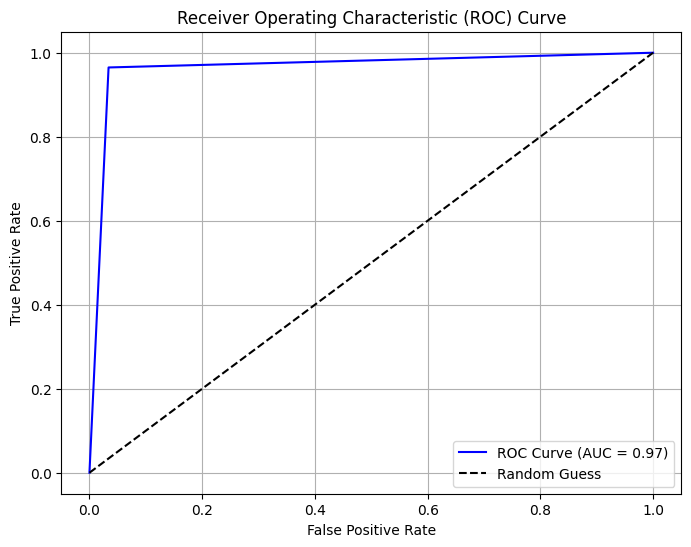

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
